In [14]:
# Import Library
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Data (Preparing and Loading)

In [15]:
# Load dataset
df = pd.read_csv("C:/Users/arya.hisma/Downloads/000. UDEMY/Udemy - Pytorch/Logistic Regression Using Pytorch - Customer Churn/dataset/customer_churn_dataset_training_master.csv")

# Display data
df.head(5)

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [16]:
df.shape

(440833, 12)

In [4]:
'''
Notes :
1. CustomerID → ID unik pelanggan (sering tidak diperlukan untuk analisis).
2. Age → Usia pelanggan (numerik).
3. Gender → Jenis kelamin pelanggan (kategori: 'Male', 'Female').
4. Tenure → Lama pelanggan berlangganan (numerik, biasanya dalam bulan/tahun).
5. Usage Frequency → Seberapa sering pelanggan menggunakan layanan (numerik).
6. Support Calls → Jumlah panggilan ke customer support (numerik).
7. Payment Delay → Keterlambatan pembayaran (numerik, bisa dalam hari).
8. Subscription Type → Jenis langganan (kategori: 'Basic', 'Premium', dll.).
9. Contract Length → Durasi kontrak pelanggan (numerik atau kategori).
10. Total Spend → Total uang yang dihabiskan pelanggan (numerik).
11. Last Interaction → Waktu terakhir pelanggan berinteraksi dengan layanan (bisa berupa tanggal atau numerik).
12. Churn → Apakah pelanggan berhenti berlangganan (biner: 'Yes' atau 'No').
'''

"\nNotes :\n1. CustomerID → ID unik pelanggan (sering tidak diperlukan untuk analisis).\n2. Age → Usia pelanggan (numerik).\n3. Gender → Jenis kelamin pelanggan (kategori: 'Male', 'Female').\n4. Tenure → Lama pelanggan berlangganan (numerik, biasanya dalam bulan/tahun).\n5. Usage Frequency → Seberapa sering pelanggan menggunakan layanan (numerik).\n6. Support Calls → Jumlah panggilan ke customer support (numerik).\n7. Payment Delay → Keterlambatan pembayaran (numerik, bisa dalam hari).\n8. Subscription Type → Jenis langganan (kategori: 'Basic', 'Premium', dll.).\n9. Contract Length → Durasi kontrak pelanggan (numerik atau kategori).\n10. Total Spend → Total uang yang dihabiskan pelanggan (numerik).\n11. Last Interaction → Waktu terakhir pelanggan berinteraksi dengan layanan (bisa berupa tanggal atau numerik).\n12. Churn → Apakah pelanggan berhenti berlangganan (biner: 'Yes' atau 'No').\n"

In [17]:
# Remove unnecessary columns
df_clean = df.drop(["CustomerID"], axis=1)
df_clean

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       30.0  Female    39.0             14.0            5.0           18.0   
1       65.0  Female    49.0              1.0           10.0            8.0   
2       55.0  Female    14.0              4.0            6.0           18.0   
3       58.0    Male    38.0             21.0            7.0            7.0   
4       23.0    Male    32.0             20.0            5.0            8.0   
...      ...     ...     ...              ...            ...            ...   
440828  42.0    Male    54.0             15.0            1.0            3.0   
440829  25.0  Female     8.0             13.0            1.0           20.0   
440830  26.0    Male    35.0             27.0            1.0            5.0   
440831  28.0    Male    55.0             14.0            2.0            0.0   
440832  31.0    Male    48.0             20.0            1.0           14.0   

       Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0               Standard          Annual       932.00              17.0    1.0  
1                  Basic         Monthly       557.00               6.0    1.0  
2                  Basic       Quarterly       185.00               3.0    1.0  
3               Standard         Monthly       396.00              29.0    1.0  
4                  Basic         Monthly       617.00              20.0    1.0  
...                  ...             ...          ...               ...    ...  
440828           Premium          Annual       716.38               8.0    0.0  
440829           Premium          Annual       745.38               2.0    0.0  
440830          Standard       Quarterly       977.31               9.0    0.0  
440831          Standard       Quarterly       602.55               2.0    0.0  
440832           Premium       Quarterly       567.77              21.0    0.0  

[440833 rows x 11 columns]

In [18]:
# Data Info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [19]:
# Label encoding for "Subscription Type" and "Contract Length"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_clean['Gender'] = le.fit_transform(df_clean['Gender'])
df_clean['Subscription Type'] = le.fit_transform(df_clean['Subscription Type'])
df_clean['Contract Length'] = le.fit_transform(df_clean['Contract Length'])

df_clean.head()

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0       0    39.0             14.0            5.0           18.0   
1  65.0       0    49.0              1.0           10.0            8.0   
2  55.0       0    14.0              4.0            6.0           18.0   
3  58.0       1    38.0             21.0            7.0            7.0   
4  23.0       1    32.0             20.0            5.0            8.0   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  2                0        932.0              17.0    1.0  
1                  0                1        557.0               6.0    1.0  
2                  0                2        185.0               3.0    1.0  
3                  2                1        396.0              29.0    1.0  
4                  0                1        617.0              20.0    1.0

In [20]:
# Data describe
describe = df_clean.describe()
describe

Age         Gender         Tenure  Usage Frequency  \
count  440832.000000  440833.000000  440832.000000    440832.000000   
mean       39.373153       0.567684      31.256336        15.807494   
std        12.442369       0.495403      17.255727         8.586242   
min        18.000000       0.000000       1.000000         1.000000   
25%        29.000000       0.000000      16.000000         9.000000   
50%        39.000000       1.000000      32.000000        16.000000   
75%        48.000000       1.000000      46.000000        23.000000   
max        65.000000       2.000000      60.000000        30.000000   

       Support Calls  Payment Delay  Subscription Type  Contract Length  \
count  440832.000000  440832.000000      440833.000000    440833.000000   
mean        3.604437      12.965722           1.013847         0.998489   
std         3.070218       8.258063           0.813972         0.895777   
min         0.000000       0.000000           0.000000         0.000000   
25%         1.000000       6.000000           0.000000         0.000000   
50%         3.000000      12.000000           1.000000         1.000000   
75%         6.000000      19.000000           2.000000         2.000000   
max        10.000000      30.000000           3.000000         3.000000   

         Total Spend  Last Interaction          Churn  
count  440832.000000     440832.000000  440832.000000  
mean      631.616223         14.480868       0.567107  
std       240.803001          8.596208       0.495477  
min       100.000000          1.000000       0.000000  
25%       480.000000          7.000000       0.000000  
50%       661.000000         14.000000       1.000000  
75%       830.000000         22.000000       1.000000  
max      1000.000000         30.000000       1.000000

In [21]:
# Correlation
corr = df_clean.select_dtypes(include=['number']).corr()

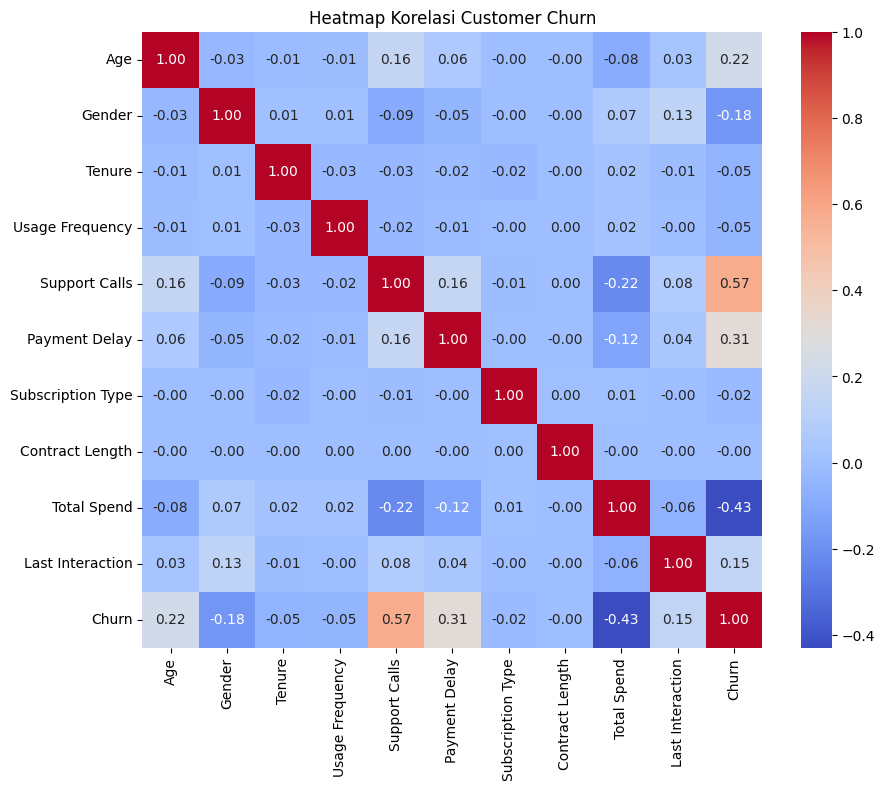

In [22]:
# Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Customer Churn")
plt.show()

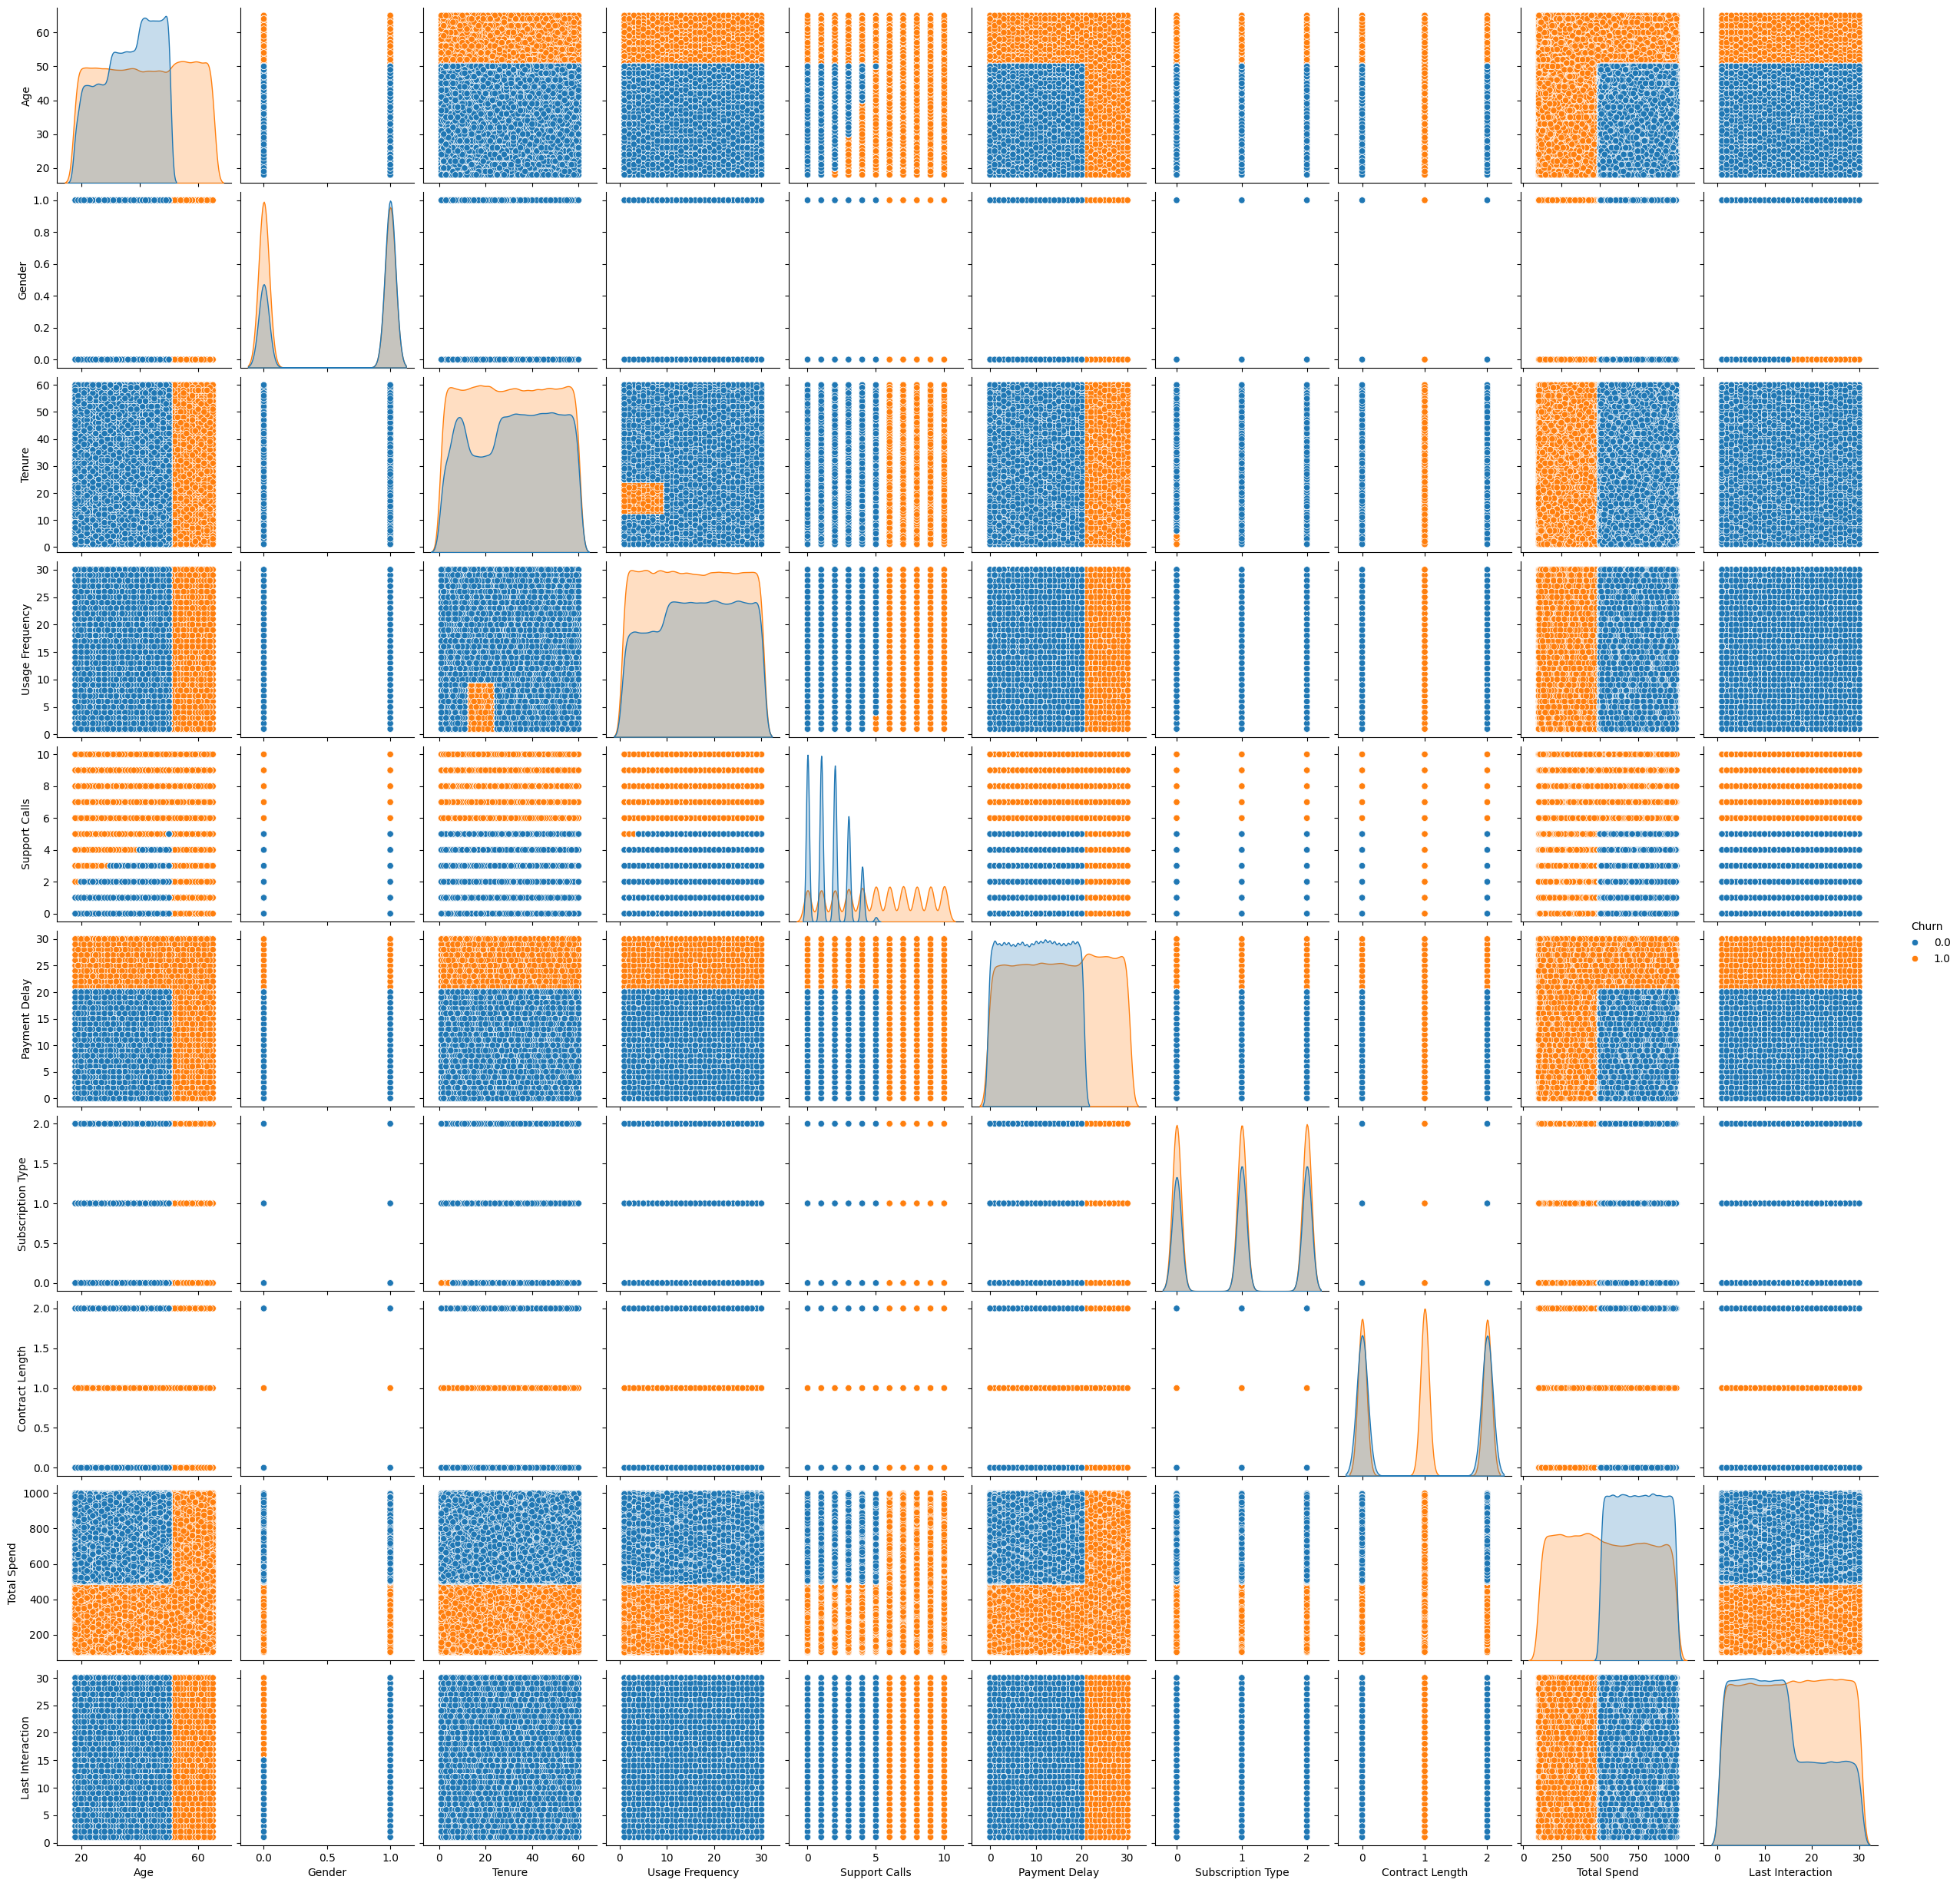

In [23]:
import seaborn as sns

sns.pairplot(df_clean, hue="Churn")